<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/TF2_0_Classification_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules & Data

In [75]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [76]:
data = load_breast_cancer()

# Understanding Data

In [77]:
### Understanding Data ###

print("Data Type : " + str(type(data)))
print("Objects stored in data : " + str(data.keys()))

print("Data Shape (sample size, features) : " + str(data.data.shape))
print("Data Shape (target size, features) : " + str(data.target.shape))

print("Data Target Name : " + str(data.target_names))
print("Data Target : " + str(data.target))
print("Data Features : " + str(data.feature_names))

Data Type : <class 'sklearn.utils.Bunch'>
Objects stored in data : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Data Shape (sample size, features) : (569, 30)
Data Shape (target size, features) : (569,)
Data Target Name : ['malignant' 'benign']
Data Target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 

# Data Pre-Processing

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
print("Train Set Size : " + str(X_train.shape))
print("Test Set Size : " + str(X_test.shape))
N,D = X_train.shape

Train Set Size : (381, 30)
Test Set Size : (188, 30)


In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Scale/transform test set with scaler fitted for train set

# Data Modeling & Training

In [80]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Dense(
        1,
        input_shape=(D,),
        activation='sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Store training log into log
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8284 - accuracy: 0.5013 - val_loss: 0.7740 - val_accuracy: 0.4947
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7554 - accuracy: 0.5617 - val_loss: 0.6954 - val_accuracy: 0.5745
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.6063 - val_loss: 0.6275 - val_accuracy: 0.6277
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.6430 - val_loss: 0.5713 - val_accuracy: 0.6543
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.6903 - val_loss: 0.5239 - val_accuracy: 0.7287
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.7270 - val_loss: 0.4837 - val_accuracy: 0.7553
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.7559 - val_loss: 0.4487 - val_accuracy: 0.7766
Epoch 8/100


# Model Evaluation

In [81]:
# [loss, accurarcy]
print("Train Score : " + str(model.evaluate(X_train, y_train)))
print("Test Score : " + str(model.evaluate(X_test, y_test)))

12/12 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9816
Train Score : [0.10695916414260864, 0.9816272854804993]
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9787
Test Score : [0.07502178102731705, 0.978723406791687]


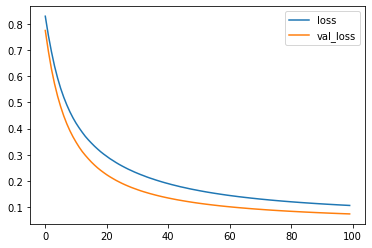

In [82]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend()

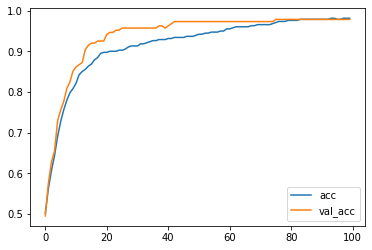

In [83]:
plt.plot(log.history['accuracy'], label='acc')
plt.plot(log.history['val_accuracy'], label='val_acc')
plt.legend()

# Predictions

In [85]:
y_predicted = model.predict(X_test)
y_predicted = np.round(y_predicted).flatten()
print(y_predicted)

[0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


In [89]:
# Compare with result from evaluation
print("Accuracy from Prediction : ", np.mean(y_predicted == y_test))
print("Accuracy from Evaluation", model.evaluate(X_test, y_test)[1])

Accuracy from Prediction :  0.9787234042553191
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9787
Accuracy from Evaluation 0.978723406791687


# Save Trained Model

In [90]:
model.save('LinearClassifier_BreastCancer')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: LinearClassifier_BreastCancer/assets


In [93]:
!ls -h

LinearClassifier_BreastCancer  sample_data


# Load Trained Model

In [95]:
model = tf.keras.models.load_model('LinearClassifier_BreastCancer')
print(model.layers)
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9787


[0.07502178102731705, 0.978723406791687]

# Download Model

In [96]:
from google.colab import files
files.download('LinearClassifier_BreastCancer')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>